In [57]:
#Carga de librerias
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
from google.colab import drive
from sklearn.cluster import KMeans
import seaborn as sns; sns.set()
from sklearn.mixture import GaussianMixture

In [2]:
#Montaje de archivos de google drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [82]:
#Leer datos 
alturas_data = pd.read_csv('/content/gdrive/MyDrive/EL2/Practica1/Alturas.csv')

In [83]:
alturas_data.rename(columns = {'Estatura(metros)':'Estatura', 'Edad(años)':'Edad'}, inplace = True)
list(alturas_data.columns)

['Estatura', 'Edad']

# Hardclustering K-Means

In [19]:
def kmeans(df,centroids):
  diff = 1
  j=0

  while(diff!=0):
      XD=df
      i=1
      for index1,row_c in centroids.iterrows():
          ED=[]
          for index2,row_d in XD.iterrows():
              d1=(row_c['Estatura']-row_d['Estatura'])**2
              d2=(row_c['Edad']-row_d['Edad'])**2
              d=np.sqrt(d1+d2)
              ED.append(d)
          df[i]=ED
          i=i+1

      C=[]
      for index,row in df.iterrows():
          min_dist=row[1]
          pos=1
          for i in range(k):
              if row[i+1] < min_dist:
                  min_dist = row[i+1]
                  pos=i+1
          C.append(pos)
      df["Cluster"]=C
      Centroids_new = df.groupby(["Cluster"]).mean()[['Estatura','Edad']]
      if j == 0:
          diff=1
          j=j+1
      else:
          diff = (Centroids_new['Estatura'] - Centroids['Estatura']).sum() + (Centroids_new['Edad'] - Centroids['Edad']).sum()
          print(diff.sum())
      Centroids = df.groupby(["Cluster"]).mean()[['Estatura','Edad']]
  return df, Centroids

## Experimento #1

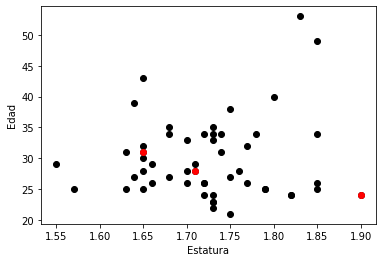

In [11]:
#definición de clusters
k=3
# Selección de centroides
centroids = (alturas_data.sample(n=k))
plt.scatter(alturas_data["Estatura"],alturas_data["Edad"],c='black')
plt.scatter(centroids["Estatura"],centroids["Edad"],c='red')
plt.xlabel('Estatura')
plt.ylabel('Edad')
plt.show()


In [21]:
df1, centroides1 = kmeans(alturas_data, centroids)


0.0


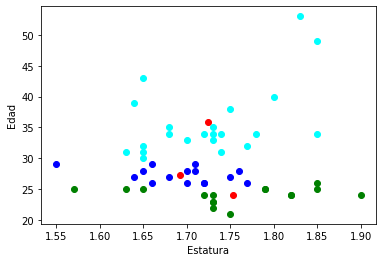

In [22]:
color=['blue','green','cyan']
for c in range(k):
    data=df1[alturas_data["Cluster"]==c+1]
    plt.scatter(data["Estatura"],data["Edad"],c=color[c])
plt.scatter(centroides1["Estatura"],centroides1["Edad"],c='red')
plt.xlabel('Estatura')
plt.ylabel('Edad')
plt.show()

**Si es posible asignar una categoria a cada cluster**

## Experimento #2

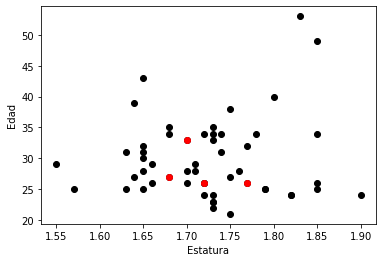

In [23]:
#definición de clusters
k=4
# Selección de centroides
centroids = (alturas_data.sample(n=k))
plt.scatter(alturas_data["Estatura"],alturas_data["Edad"],c='black')
plt.scatter(centroids["Estatura"],centroids["Edad"],c='red')
plt.xlabel('Estatura')
plt.ylabel('Edad')
plt.show()

In [26]:
df2, centroides2 = kmeans(alturas_data, centroids)

0.0


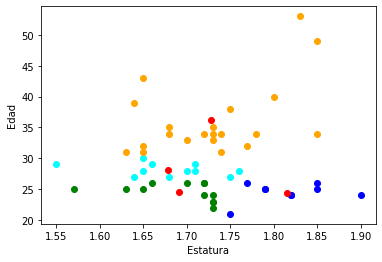

In [29]:
color=['blue','green','cyan','orange']
for c in range(k):
    data=df2[alturas_data["Cluster"]==c+1]
    plt.scatter(data["Estatura"],data["Edad"],c=color[c])
plt.scatter(centroides2["Estatura"],centroides2["Edad"],c='red')
plt.xlabel('Estatura')
plt.ylabel('Edad')
plt.show()

**No se podria asignar una categoria a cada cluster**

## Experimento #3

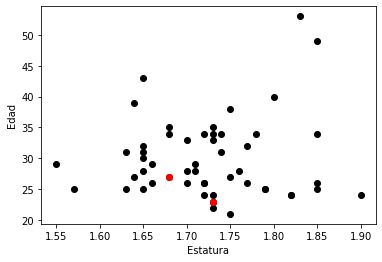

In [30]:
#definición de clusters
k=2
# Selección de centroides
centroids = (alturas_data.sample(n=k))
plt.scatter(alturas_data["Estatura"],alturas_data["Edad"],c='black')
plt.scatter(centroids["Estatura"],centroids["Edad"],c='red')
plt.xlabel('Estatura')
plt.ylabel('Edad')
plt.show()

0.0


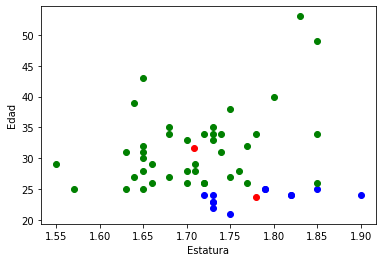

In [31]:
df3, centroides3 = kmeans(alturas_data, centroids)
color=['blue','green']
for c in range(k):
    data=df2[alturas_data["Cluster"]==c+1]
    plt.scatter(data["Estatura"],data["Edad"],c=color[c])
plt.scatter(centroides3["Estatura"],centroides3["Edad"],c='red')
plt.xlabel('Estatura')
plt.ylabel('Edad')
plt.show()

**No se podria asignar una categoria a cada cluster**

## Experimento #4


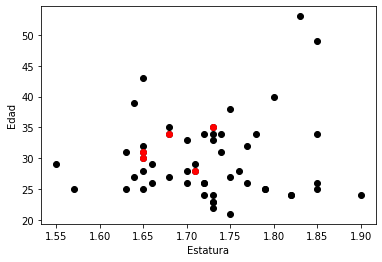

In [40]:
#definición de clusters
k=5
# Selección de centroides
centroids = (alturas_data.sample(n=k))
plt.scatter(alturas_data["Estatura"],alturas_data["Edad"],c='black')
plt.scatter(centroids["Estatura"],centroids["Edad"],c='red')
plt.xlabel('Estatura')
plt.ylabel('Edad')
plt.show()

0.0


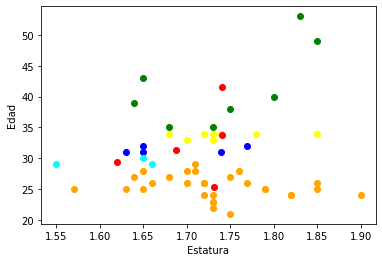

In [41]:
df4, centroides4 = kmeans(alturas_data, centroids)
color=['blue','green','orange','yellow','cyan']
for c in range(k):
    data=df2[alturas_data["Cluster"]==c+1]
    plt.scatter(data["Estatura"],data["Edad"],c=color[c])
plt.scatter(centroides4["Estatura"],centroides4["Edad"],c='red')
plt.xlabel('Estatura')
plt.ylabel('Edad')
plt.show()

**No se podria asignar una categoria a cada cluster**

## Experimento #5

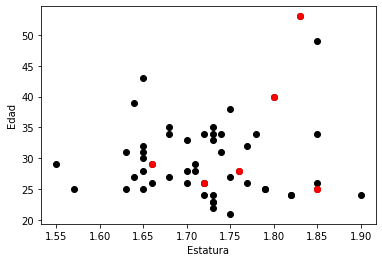

In [35]:
#definición de clusters
k=6
# Selección de centroides
centroids = (alturas_data.sample(n=k))
plt.scatter(alturas_data["Estatura"],alturas_data["Edad"],c='black')
plt.scatter(centroids["Estatura"],centroids["Edad"],c='red')
plt.xlabel('Estatura')
plt.ylabel('Edad')
plt.show()

0.0


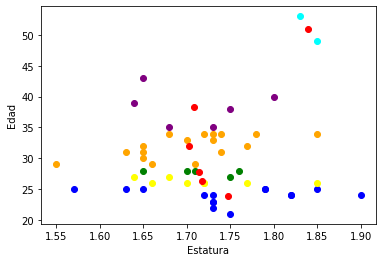

In [38]:
df5, centroides5 = kmeans(alturas_data, centroids)
color=['blue','green','orange','yellow','purple','cyan']
for c in range(k):
    data=df2[alturas_data["Cluster"]==c+1]
    plt.scatter(data["Estatura"],data["Edad"],c=color[c])
plt.scatter(centroides5["Estatura"],centroides5["Edad"],c='red')
plt.xlabel('Estatura')
plt.ylabel('Edad')
plt.show()

**No se podria asignar una categoria a cada cluster**

# Soft-clustering con GMM

##Experimento #1

In [60]:
k=3
gmm1 = alturas_data
model = GaussianMixture(n_components=k, max_iter=10000, n_init=100, random_state=0) 
gmm1['Cluster'] = model.fit_predict(gmm1)

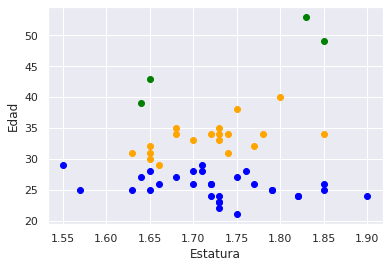

In [65]:
color=['blue','green','orange']
for c in range(k):
    data=gmm1[gmm1["Cluster"]==c]
    plt.scatter(data["Estatura"],data["Edad"],c=color[c])
plt.xlabel('Estatura')
plt.ylabel('Edad')
plt.show()

**Si es posible asignar una categoria a cada cluster**

## Experimento #2

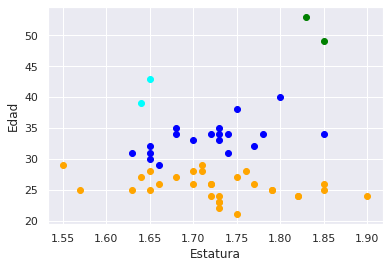

In [66]:
k=4
gmm2 = alturas_data
model = GaussianMixture(n_components=k, max_iter=10000, n_init=100, random_state=0) 
gmm2['Cluster'] = model.fit_predict(gmm2)
color=['blue','green','orange','cyan']
for c in range(k):
    data=gmm2[gmm2["Cluster"]==c]
    plt.scatter(data["Estatura"],data["Edad"],c=color[c])
plt.xlabel('Estatura')
plt.ylabel('Edad')
plt.show()

**Si es posible asignar una categoria a cada cluster**

## Experimento #3

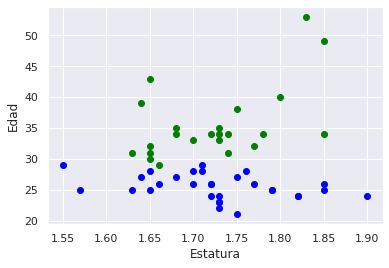

In [68]:
k=2
gmm3 = alturas_data
model = GaussianMixture(n_components=k, max_iter=10000, n_init=100, random_state=0) 
gmm3['Cluster'] = model.fit_predict(gmm3)
color=['blue','green']
for c in range(k):
    data=gmm3[gmm3["Cluster"]==c]
    plt.scatter(data["Estatura"],data["Edad"],c=color[c])
plt.xlabel('Estatura')
plt.ylabel('Edad')
plt.show()

**Si es posible asignar una categoria a cada cluster**

## Experimento #4

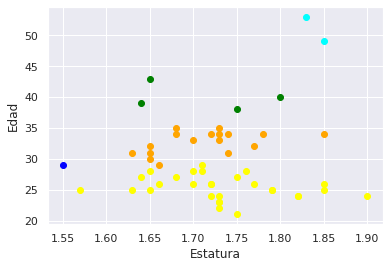

In [70]:
k=5
gmm4 = alturas_data
model = GaussianMixture(n_components=k, max_iter=10000, n_init=100, random_state=0) 
gmm4['Cluster'] = model.fit_predict(gmm4)
color=['blue','green','orange','yellow','cyan']
for c in range(k):
    data=gmm4[gmm4["Cluster"]==c]
    plt.scatter(data["Estatura"],data["Edad"],c=color[c])
plt.xlabel('Estatura')
plt.ylabel('Edad')
plt.show()

**Si es posible asignar una categoria a cada cluster**

## Experimento #5

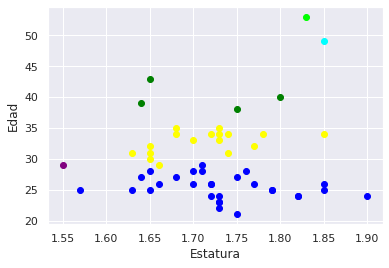

In [73]:
k=6
gmm5 = alturas_data
model = GaussianMixture(n_components=k, max_iter=10000, n_init=100, random_state=0) 
gmm5['Cluster'] = model.fit_predict(gmm5)
color=['blue','green','yellow','cyan','purple','lime']
for c in range(k):
    data=gmm5[gmm5["Cluster"]==c]
    plt.scatter(data["Estatura"],data["Edad"],c=color[c])
plt.xlabel('Estatura')
plt.ylabel('Edad')
plt.show()

**Si es posible asignar una categoria a cada cluster**


## Conclusiones método del codo
El método del codo, es adecuado para este problema

### Valores de prueba

In [113]:
#Leer datos 
test_data = pd.read_csv('/content/gdrive/MyDrive/EL2/Practica1/valtest.csv')

In [114]:
k=3
gmm1 = alturas_data
model = GaussianMixture(n_components=k, max_iter=10000, n_init=100, random_state=0) 
model.fit(gmm1)

GaussianMixture(max_iter=10000, n_components=3, n_init=100, random_state=0)

In [86]:
test_data['Cluster'] = model.predict(test_data)

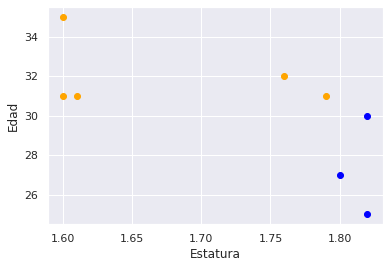

In [88]:
color=['blue','green','orange']
for c in range(k):
    data=test_data[test_data["Cluster"]==c]
    plt.scatter(data["Estatura"],data["Edad"],c=color[c])
plt.xlabel('Estatura')
plt.ylabel('Edad')
plt.show()

In [91]:
probs = model.predict_proba(test_data)

In [97]:
probsdf = pd.DataFrame(probs,columns = ['Prob Cluster 1','Prob Cluster 2','Prob Cluster 2'])

In [104]:
pd.concat([test_data, probsdf], axis=1)

,Estatura,Edad,Prob Cluster 1,Prob Cluster 2,Prob Cluster 2
0,1.82,25,0.999991,3.891283e-30,0.000009
1,1.80,27,0.998324,1.981126e-23,0.001676
2,1.60,31,0.164277,4.285777e-04,0.835294
3,1.60,35,0.000864,4.112452e-01,0.587891
4,1.82,30,0.549020,2.642344e-18,0.450980
5,1.76,32,0.003679,1.685490e-11,0.996321
6,1.79,31,0.048333,1.264782e-14,0.951667
7,1.61,31,0.129252,1.503658e-04,0.870598


## Simulación

In [115]:
test_data_sample = model.sample(1000)

In [120]:
test_data_sample_features = test_data_sample[0]
tddf = pd.DataFrame(test_data_sample_features,columns = ['Estatura','Edad'])

In [123]:
#Valores esperados
tddf.mean()

Estatura     1.721028
Edad        29.586208
dtype: float64